# Code and visualization for the challenge

In [1]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


In [57]:
training_v2 = pd.read_csv("Data/training_v2.csv")
test = pd.read_csv("Data/unlabeled.csv")
y = training_v2['hospital_death']
X = training_v2
X = training_v2.drop('hospital_death',axis = 1)

In [3]:
descrip_dict = pd.read_csv("Data/WiDS Datathon 2020 Dictionary.csv",index_col = ['Variable Name'])

In [21]:
descrip_dict

,Category,Unit of Measure,Data Type,Description,Example
Variable Name,,,,,
encounter_id,identifier,None,integer,Unique identifier associated with a patient un...,None
hospital_id,identifier,None,integer,Unique identifier associated with a hospital,None
patient_id,identifier,None,integer,Unique identifier associated with a patient,None
hospital_death,demographic,None,binary,Whether the patient died during this hospitali...,0
age,demographic,Years,numeric,The age of the patient on unit admission,None
...,...,...,...,...,...
lymphoma,APACHE comorbidity,None,binary,Whether the patient has been diagnosed with no...,1
solid_tumor_with_metastasis,APACHE comorbidity,None,binary,Whether the patient has been diagnosed with an...,1
apache_3j_bodysystem,APACHE grouping,None,string,Admission diagnosis group for APACHE III,Cardiovascular


### Missing data ###
Tina
Reference:
1. [A New Insight Into Missing Data in Intensive Care Unit Patient Profiles: Observational Study
](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6329436/)
    - Using this, we convert variables with the most missing data to another type of indicator called missingness. 0 if missing var 
 
Summary of missing data

Select and fill in important variables that miss a lot of data

In [5]:
#import chart_studio.plotly as py
import missingno as msno 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

ImportError: No module named 'missingno'

In [23]:
import plotly.tools as tls 
from plotly.graph_objs import * 

In [24]:
total_patient_data = X.index.nunique()
high_miss_var = []
miss_perct = []
threshold = .50 # variables that have missing 60% 

#X.isnull().sum()

for var in X.columns:
    count = 0 
    for value in X[var].values:
        if pd.isnull(value):    
            count = count + 1     
    miss_rate = (count/total_patient_data)
    if miss_rate >= threshold:
        high_miss_var.append(var)
        miss_perct.append(miss_rate)
missing_stat = pd.DataFrame(miss_perct, columns = ['miss_rate'], index = high_miss_var)


Variables that have high percentages of missing values are illustrated below

In [25]:
fig = px.bar(missing_stat, x=missing_stat.index, y='miss_rate')
fig.show()

In [26]:
missing_stat.miss_rate

albumin_apache          0.592926
bilirubin_apache        0.633869
fio2_apache             0.772715
paco2_apache            0.772715
paco2_for_ph_apache     0.772715
                          ...   
h1_arterial_ph_min      0.833295
h1_arterial_po2_max     0.828072
h1_arterial_po2_min     0.828072
h1_pao2fio2ratio_max    0.874413
h1_pao2fio2ratio_min    0.874413
Name: miss_rate, Length: 74, dtype: float64

In [3]:
#auxiliary matrix (containing the missingness indicators: 0-present, 1-absent)
aux_mask= pd.isnull(X)
augmented_X = X
for m_var in list(missing_stat.index):
    augmented_X[m_var] = aux_mask[m_var]
augmented_X

NameError: name 'missing_stat' is not defined

In [4]:
augmented_X.to_csv("Data/Augmented_untrained_data.csv")

### Data imputation
Jenny

For features that miss not a lot of data, try interpolation or matrix factorization(do it separately for train and test set)

convert all categorial variables into dummy variables.
For example, under body systems, there are 9 categories: "cardiovascular",
"respiratory", "Metabolic" etc
will insert 9 columns, each column containing 0 or 1

- should not be a string: bmi, apache_2_diagnosis, apache_3j_diagnosis,
- categorical variables: ethnicity, gender, hospital_admit_source, icu_admit_source, icu_admit_type, icu_stay_type, icu_type, readmission_status, apache_3j_bodysystem, apache_2_bodysystem

In [ ]:
categorial_variables = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_admit_type', 'icu_stay_type', 'icu_type', 'readmission_status', 'apache_3j_bodysystem', 'apache_2_bodysystem']

In [ ]:
# some variables should remain 0
# some variables are filled in with mean/median/ frequent etc

In [108]:
from sklearn.impute import SimpleImputer
# X_for_imputation = X.copy()
X_for_imputation = test_floats.copy()

Simple_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")
# Simple_median = SimpleImputer(missing_values = np.nan, strategy = "median")
# Simple_frequent = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
# Simple_constant = SimpleImputer(missing_values = np.nan, strategy = "constant")
X_mean = X_for_imputation.copy()
Simple_mean.fit(X_mean)
print(Simple_mean.transform(X_mean))

[[2.53120e+04 1.18000e+02 6.80000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [5.93420e+04 8.10000e+01 7.70000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [5.07770e+04 1.18000e+02 2.50000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [5.81790e+04 1.95000e+02 4.80000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.20598e+05 6.60000e+01 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [5.36120e+04 1.04000e+02 8.20000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]


In [101]:
# iterative imputation, package is experimental
# I ran this on my laptop for 20 minutes and it gave me this error:
# [IterativeImputer] Early stopping criterion not reached

# require this experimental feature
from sklearn.experimental import enable_iterative_imputer # noqa
from sklearn.impute import IterativeImputer

X_for_imputation = X.copy()

# iterative imputer only works with numbers, not categories
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
iterative_x = X_for_imputation.selecte_dtypes(include=numerics)
iterative = IterativeImputer()
iterative.fit(iterative_x)

ImportError: No module named 'sklearn.experimental'

In [56]:
# nearest neighbor imputation

import numpy as np
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer

X_for_imputation = X.copy()
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(X_for_imputation)
mask_missing_values_only

nn_imputer = KNNImputer(n_neighbors = 2, weights = "uniform")
nn_imputer = KNNImputer()
imputer.fit_transform(X_for_imputation)

ImportError: cannot import name 'KNNImputer'

In [ ]:
# matrix factorization imputation

##### PLSR

PLSR can only identify at most 24% of variance in the data, not good :(. After removing non-numeric columns, and non-essential columns, I had 169 variables. Variables positively correlated with hospital death are: heart rate max min, resprate max min, death_prob, 
Variables with negative correlations are: gcs_motor, eyes, verbal, d1_spo2_min, d1_mbp_noninvasive_min.

I will do imputation later as Yu suggested: If bilirubin has values then convert to 1, if cell is empty then convert to 0. Other values (such as pH) will be imputed with average. Then try PLSR again.

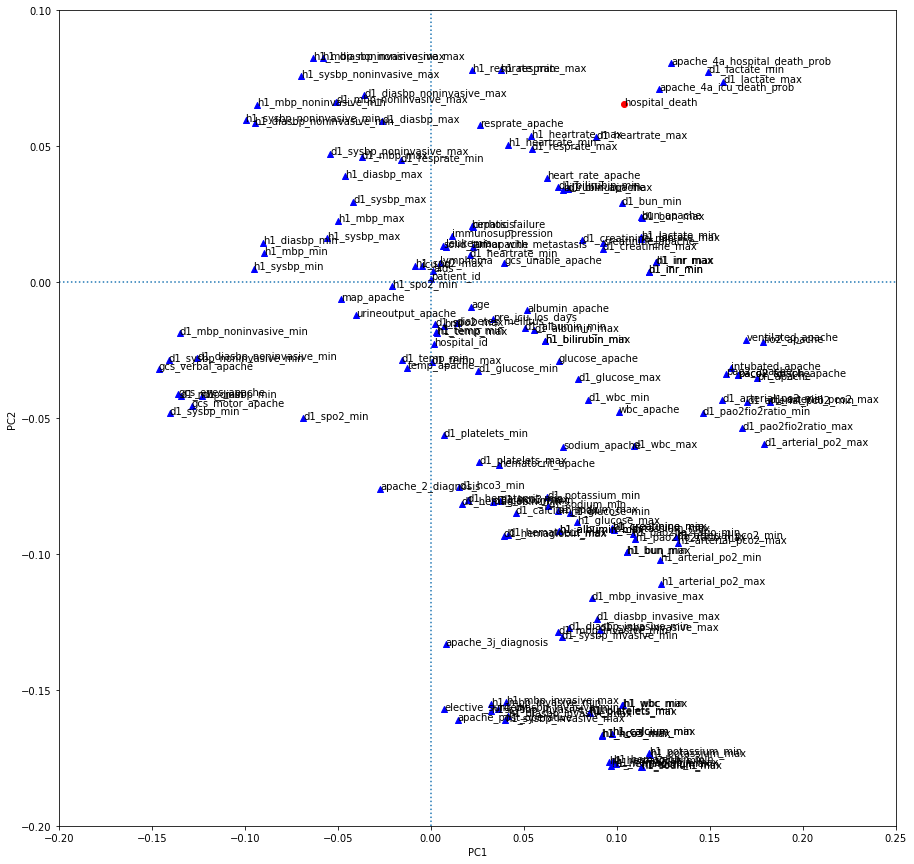

In [24]:
# PCA to identify important components, just for understanding
# variables in the top right and bottow left quadrants are correlated with outcome

from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

og_training = training_v2.copy() # ((91713, 186))
# the following columns are deleted, because redundant information, or not useful
# height and weight are represented by the variable bmi
# readmission_status are all 0
# 4 ph values have low variance, also measurement is insensitive, pH values do not indicate patient health well
deleted_variables = ['encounter_id', 'height', 'weight', 'readmission_status', 'd1_arterial_ph_max',
                    'd1_arterial_ph_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min']
cleaned_training = og_training.drop(deleted_variables,1) # (91713, 178)
n_missing = cleaned_training.isnull().sum()
missing_n_per_col = list(zip(list(cleaned_training), n_missing))
# number of missing cells per column
missing_n_per_col.sort(key = lambda x:x[1], reverse = True);

true_y = np.asarray(cleaned_training['hospital_death'])
test_j = cleaned_training.drop("hospital_death", 1)

# remove non-numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
test_floats = np.asarray(test_j.select_dtypes(include=numerics).fillna(0)) # (91713, 119)

PLSRmodel = PLSRegression(n_components=15)
PLSRmodel.fit_transform(test_floats, true_y);
xloadscores, yloadscores = PLSRmodel.x_loadings_, PLSRmodel.y_loadings_

plt.figure(figsize=(15,15))
plt.xlim(-0.2, 0.25)
plt.ylim(-0.2, 0.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(xloadscores[:, 0], xloadscores[:, 1], c='b', marker='^')
plt.scatter(yloadscores[:, 0], yloadscores[:, 1], c='r', marker='o')
plt.axhline(0, linestyle = ":")
plt.axvline(0, linestyle = ":")
plt.annotate('hospital_death', (yloadscores[:, 0], yloadscores[:, 1]))
column_names = list(test_j.select_dtypes(include=numerics))
for i, label in enumerate(column_names):
    plt.annotate(label, (xloadscores[i, 0], xloadscores[i, 1]));

In [128]:
# PLSR prediction on training data (augmented_X) (185 variables)
# if in the future want to try different imputation methods, just change input_data
input_data = augmented_X

from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale


cleaned_testing = input_data.copy()
# remove non-numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
training_set = cleaned_testing.select_dtypes(include=numerics)
# change NaN to 0, this step shouldn't be here? input matrix shouldn't have NaN
training_set = np.asarray(training_set.fillna(0))

# R^2 value with 5 components is 0.23011710092292928
# R^2 value with 10 components is 0.2378901747393631
# R^2 value with 15 components is 0.24083956607470738
# R^2 value with 25 components is 0.24233640027140324

PLSRmodel = PLSRegression(n_components = 15)
PLSRmodel.fit_transform(training_set, true_y)
train_predictions = PLSRmodel.predict(training_set)

# define threshold

def PLSR_threshold (input_prediction, threshold):
    binary_output = np.zeros(input_prediction.shape)
    for idx, patient in enumerate(input_prediction):
        if patient <= threshold:
            binary_output[idx] = 0
        else:
            binary_output[idx] = 1
            
    return binary_output

converted_prediction = PLSR_threshold(train_predictions, 0.3)
converted_prediction = [int(i) for i in converted_prediction]


def truth_table(real, pred):
    # positive = no death
    # negative = death
    true_positive = 0# real no death, predicted no death
    false_positive = 0 # real death, predicted no death
    false_negative = 0 # real no death, predicted death
    true_negative = 0 # real death, predicted death
    for idx, subject in enumerate(real):
        
        # real patient no death
        if subject == 0:
            
            # predicted no death
            if pred[idx] == 0:
                # true positive
                true_positive += 1
                
            else:
                # pred[idx] >= threshold
                # predicted death
                # false negative
                false_negative += 1
        
        # real patient is death
        else:
            
            # predicted no death
            if pred[idx] == 0:
                # false positive
                false_positive += 1
            
            # predicted death
            else:
                # pred[idx] >= threshold
                # prediced death
                # true negative
                true_negative += 1
        
        num_real_death = 7915
        num_no_death = 83798
                
    print("TP rate is", true_positive/num_no_death)
    print("FN rate is", false_negative/num_no_death)
    print("FP rate is", false_positive/num_real_death)
    print('TN rate is', true_negative/num_real_death)
    return true_positive, false_positive, false_negative, true_negative
    
tp, fp, fn, tn = truth_table(true_y, converted_prediction)

TP rate is 0.9649275639036731
FN rate is 0.03507243609632688
FP rate is 0.5706885660138976
TN rate is 0.42931143398610233


In [71]:
# PLSR prediction on test data

from sklearn.cross_decomposition import PLSRegression

cleaned_testing =test.copy()
# cleaned_testing = cleaned_testing.drop(deleted_variables,1)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
test_set = np.asarray(cleaned_testing.select_dtypes(include=numerics).fillna(0))
# print(test_set)

PLSRpredict = PLSRegression(n_components = 15)
PLSRpredict.fit_transform(test_set)
test_predictions = PLSRpredict.predict(test_set)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#before imputation, should delete categorical 

In [46]:
#impute values based on different methods

#method 1: just fill in 0 for all NA
sim_impute_X = augmented_X.fillna(0)

#method 2: impute based on univariate features (mean,median, most frequent)
#problem with using this is... significant APACHE var influenced are probably biased  
freq_impute = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
freq_impute.fit(augmented_X)
freq_impute_X = mean_impute.transform(augmented_X)
freq_impute_X = pd.DataFrame(mean_impute_X, columns= augmented_X.columns) 


#method 3: multple imputations


#method 4: matrix factorization



imputed_X = sim_impute_X

### Feature selection
Yu

remove Collinear (highly correlated) features

(Optional)remove Features with zero importance in a tree-based model


In [18]:
# Remove the colinear features
# threshold for the correlation
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = X.corr().abs()
corr_matrix.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
encounter_id,1.000000,0.009575,0.004532,0.003990,0.001068,0.002036,0.005400,0.000992,0.000570,NaN,...,0.000513,0.000344,0.001907,0.007601,0.003402,0.000972,0.001707,0.002172,0.001176,0.004646
patient_id,0.009575,1.000000,0.007075,0.006343,0.001380,0.001387,0.002902,0.001770,0.004412,NaN,...,0.003735,0.001625,0.002426,0.001307,0.000434,0.001667,0.000548,0.000844,0.002333,0.003065
hospital_id,0.004532,0.007075,1.000000,0.008673,0.012874,0.052123,0.027895,0.004526,0.001285,NaN,...,0.006993,0.000283,0.004947,0.002962,0.011978,0.001362,0.000146,0.002992,0.002588,0.004730
age,0.003990,0.006343,0.008673,1.000000,0.087077,0.067320,0.109937,0.024257,0.049872,NaN,...,0.143167,0.076275,0.029477,0.028065,0.077908,0.020061,0.025007,0.030310,0.023335,0.025924
bmi,0.001068,0.001380,0.012874,0.087077,1.000000,0.015921,0.056316,0.001403,0.001531,NaN,...,0.033546,0.013796,0.020434,0.002377,0.172943,0.001855,0.031144,0.013375,0.010017,0.043380


In [19]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to be removed.' % (len(to_drop)))
print("These are columns to be removed", to_drop)
#Drop the columns with high correlations
X = X.drop(columns = to_drop)

There are 59 columns to be removed.
These are columns to be removed ['apache_post_operative', 'paco2_for_ph_apache', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_platelets_min', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h

### Features preprocessing

convert features into their correct form, categories to categories, numeric number to real number


In [33]:
from sklearn import preprocessing

In [1]:
#if we decided to use imputed data
#X = augmented_X


categories = [ 'hospital_id','ethnicity','gender','hospital_admit_source','icu_admit_source',
              'icu_stay_type','apache_3j_bodysystem','apache_2_bodysystem']
x_copy = X.astype({'hospital_id': 'object'})
categorical = pd.get_dummies(x_copy[categories], dummy_na=True)
continuous = X.drop(columns=categories)
continuous = continuous.astype('int32')                                       #after imputation, this error should be fixed
x = pd.concat([continuous,categorical],axis=1)

NameError: name 'X' is not defined

### Splitting data


In [20]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### Models
pick whichever you want
### Logistic regression
Jewel

### SVM 
(Tina)

In [23]:
clf = SVC(kernel = 'poly')    # try 'linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
clf.fit(X_train, y_train)                  #Train the model using the training sets
y_pred = clf.predict(X_test)                #Predict the response for test dataset
print(precision_recall_fscore_support(y_test, y_pred, average='binary'))

ValueError: could not convert string to float: 'Neurologic'

### Random forest

In [22]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(precision_recall_fscore_support(y_test, predictions, average='binary'))

ValueError: could not convert string to float: 'Other/Unknown'

### Boosting methods
Yu

### Neural Net